In [56]:
# processing
import numpy as np
import pandas as pd
from Bio import SeqIO

# custom package
import tregs

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

In [2]:
_genome = []
for record in SeqIO.parse("../../data/mg1655_genome.fasta", "fasta"):
    _genome.append(str(record.seq))
genome = _genome[0]

In [3]:
def count_matches(seq1, seq2):
    n_matches = 0
    for i in range(len(seq1)):
        if seq1[i] == seq2[i]:
            n_matches += 1
    return n_matches

In [4]:
def search_tata(seqs):
    matches = np.zeros(7)
    for seq in seqs:
        seq = seq.upper()
        for i in range(len(seq) - 6):
            window = seq[i:(i+6)]
            m = count_matches(window, 'TATAAT')
            matches[m] += 1
    return matches


In [5]:
matches = search_tata([genome])

In [28]:
np.sum(matches[4:]) / np.sum(matches) * 100

3.5220479976284276

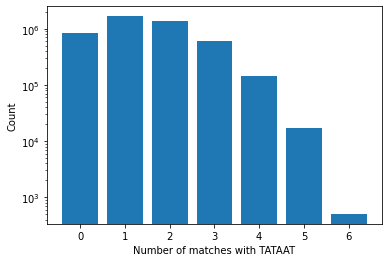

In [11]:
fig, ax = plt.subplots()
ax.bar(np.arange(0,7,1), matches)
ax.set_yscale('log')
ax.set_xlabel('Number of matches with TATAAT')
ax.set_ylabel('Count')
plt.show()

In [19]:
df = pd.read_csv('../../data/ecoli_gene_list.csv')
df = df.drop_duplicates(subset='tss')
df.head()

,gene,promoter,gene_position,direction,tss,evidence
0,accA,accAp2,208621.0,+,208326.0,"[""none"", ""EXP""]"
1,accA,accAp1,208621.0,+,208411.0,"[""COMP"", ""EXP"", ""EXP""]"
2,accB,accBp1,3405436.0,+,3405140.0,"[""COMP"", ""EXP"", ""COMP""]"
4,accB,accBp2,3405436.0,+,3405172.0,"[""none"", ""EXP""]"
6,accD,accDp,2433926.0,-,2434015.0,"[""COMP"", ""COMP"", ""EXP""]"


In [20]:
promoters = []
for index, row in df.iterrows():
    promoter = tregs.seq_utils.get_regulatory_region(genome, int(row['tss']), reverse=True)
    promoters.append(promoter)

In [22]:
matches_promoters = search_tata(promoters)

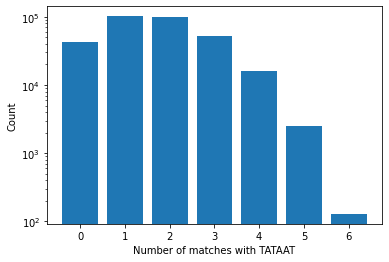

In [23]:
fig, ax = plt.subplots()
ax.bar(np.arange(0,7,1), matches_promoters)
ax.set_yscale('log')
ax.set_xlabel('Number of matches with TATAAT')
ax.set_ylabel('Count')
plt.show()

In [27]:
np.sum(matches_promoters[4:]) / np.sum(matches_promoters) * 100

5.903245173318166

In [37]:
def search_tata(seqs):
    matches = np.zeros(7)
    matches_pos = np.zeros((3, 160))
    for seq in seqs:
        seq = seq.upper()
        for i in range(len(seq) - 6):
            window = seq[i:(i+6)]
            m = count_matches(window, 'TATAAT')
            matches[m] += 1
            if m >= 4:
                matches_pos[m-4, i] += 1
    return matches, matches_pos

In [38]:
matches, pos = search_tata(promoters)

In [58]:
len(promoters)

2055

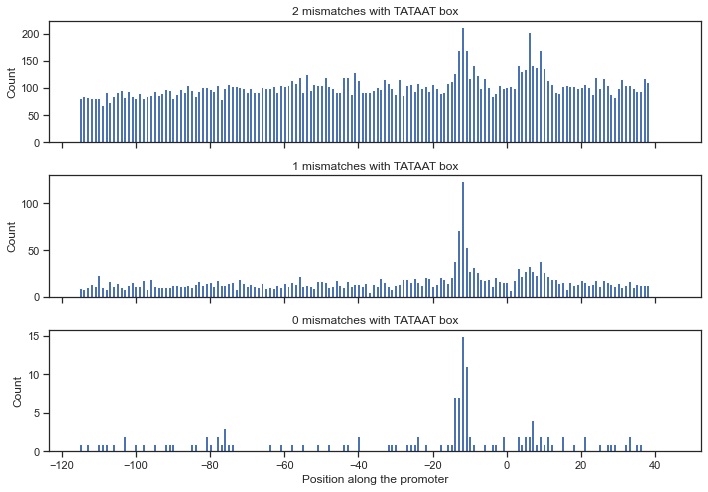

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(10,7),
                         sharex=True)
for i in range(3):
    axes[i].bar(np.arange(-115, 45), pos[i, :])
    axes[i].set_title('{} mismatches with TATAAT box'.format(2-i))
    axes[i].set_ylabel('Count', fontsize=12)

axes[-1].set_xlabel('Position along the promoter', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
def count_matches(seq1, seq2):
    n_matches = 0
    for i in range(len(seq1)):
        if seq1[i] == seq2[i]:
            n_matches += 1
    return n_matches